# title: tfcb_2020_capstone_cwc
# author: Cara Chao
# date: 2020-12-13

# About the data: 
# Glaucoma diagnosis takes into acount multiple measurements including age, ocular pressur, PSD, GHT, cornea thickness, and in this case the RNFL4.mean (see README for a discription of every variable in this dataset)
# Since glaucoma is known to manifest at higher ages, I was interested in seeing whether PCA analysis of age and two other measurements (ocular pressure and cornea thickness) would indicate any level of relatedness.
# This data tackles my first question from the README: Is age related to ocular pressure or cornea thickness? What does that mean for age and glaucoma diagnosis?

# I first generated scatterplots between age and ocular pressure or cornea thickness.
# These scatterplots don't tell us if there is any apparent relationship or trend between these variables. However, there may be a trend when it comes to ocular pressure and age.
# PCA analyis, along with their respective scaled plots, show that neither ocular pressure or cornea thickness are related with age.
# Thus within this dataset, there is no correlation between age and both ocular pressure and cornea thickness, based on PCA.
# This suggests that age has no role in determining the ocular pressure or cornea thickness within these data. 

In [4]:
import re
import Bio.SeqIO
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

glaucdata_whole = 'dataset/ds_whole.csv'
df_whole = pd.read_csv(glaucdata_whole) #dataframe of the whole glaucoma dataset, including training and testing data. 
df_whole

,RL,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
0,OD,0,62,17,-0.54,1.81,0,558,103.333333
1,OS,0,62,17,-0.64,1.38,0,564,107.666667
2,OD,0,66,12,-1.65,2.89,2,490,162.000000
3,OS,0,66,12,-1.14,3.88,2,495,99.000000
4,OD,1,53,24,-2.90,3.78,2,547,74.666667
...,...,...,...,...,...,...,...,...,...
494,OS,0,13,15,-2.44,2.49,0,531,109.666667
495,OD,0,55,15,-1.21,2.17,0,562,109.333333
496,OS,0,55,16,-0.84,1.86,0,566,110.333333
497,OD,0,55,18,-0.43,1.91,0,545,120.666667


Text(0.5, 1.0, 'cornea thickness vs age')

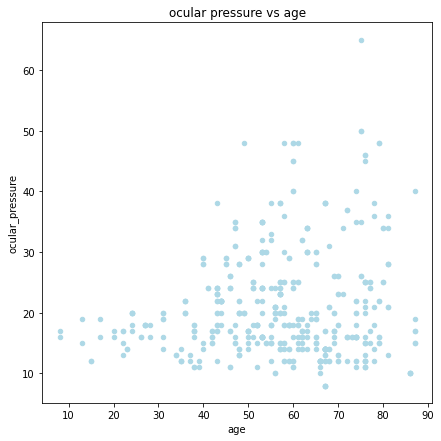

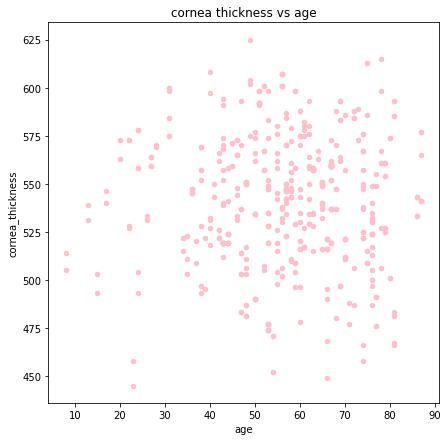

In [5]:
df_whole.plot.scatter(y='ocular_pressure', x='age', figsize=(7,7), c='lightblue')
plt.title("ocular pressure vs age")
df_whole.plot.scatter(y='cornea_thickness', x='age', figsize=(7,7), c='pink')
plt.title("cornea thickness vs age")

# from a plain scatter plot between ocular pressure and age, 

In [16]:
# dropping the non-continuous columns and keeping those that are continuous to a new datatable
df_cont = df_whole[['age', 'ocular_pressure', 'MD', 'PSD', 'cornea_thickness', 'RNFL4.mean']]


In [17]:
# checking to see if "RL" column was dropped. 
df_cont

,age,ocular_pressure,MD,PSD,cornea_thickness,RNFL4.mean
0,62,17,-0.54,1.81,558,103.333333
1,62,17,-0.64,1.38,564,107.666667
2,66,12,-1.65,2.89,490,162.000000
3,66,12,-1.14,3.88,495,99.000000
4,53,24,-2.90,3.78,547,74.666667
...,...,...,...,...,...,...
494,13,15,-2.44,2.49,531,109.666667
495,55,15,-1.21,2.17,562,109.333333
496,55,16,-0.84,1.86,566,110.333333
497,55,18,-0.43,1.91,545,120.666667


In [18]:
pca = PCA(n_components=6)

In [19]:
pca.fit(df_cont)

PCA(n_components=6)

In [20]:
print(f"The fraction of the variation in the dataset captured by the first two components is:") 
print(f"{pca.explained_variance_ratio_[0]} and {pca.explained_variance_ratio_[1]}")

The fraction of the variation in the dataset captured by the first two components is:
0.5355397992411411 and 0.3174248734002949


In [21]:
X_pca=pca.transform(df_cont)
X_pca.shape

(499, 6)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_cont) ## fit the new scaler object to the model 
print('mean:', scaler.mean_)
print('variance:', scaler.var_)

X_df_scale = scaler.transform(df_cont) ## transform the data by appling the fitted model by subtracting mean and dividing by SD

pca2 = PCA(n_components=6) ## create PCA model
pca2.fit(X_df_scale) ## fit new PCA model to the transformed data from earlier
X_pca2 = pca2.transform(X_df_scale) ## transform the data to the new PCA coordinate system

mean: [ 56.84569138  20.96392786  -8.66138277   5.51208417 540.30861723
  82.55177021]
variance: [ 236.94011671   72.90451042  105.81332654   18.13353233 1126.34563717
  663.27025463]


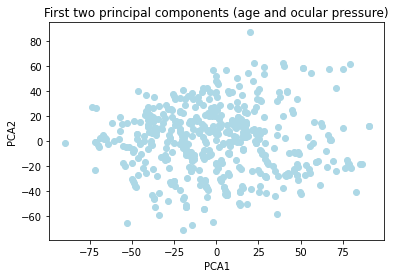

In [25]:
# plotting the raw PCA plot between PCA1 = age and PCA2 = ocular pressure
plt.scatter( X_pca[:,0], X_pca[:,1], c= "lightblue")
plt.title('First two principal components (age and ocular pressure)')
plt.xlabel('PCA1')
plt.ylabel('PCA2');

Text(0.5, 0, 'PCA1')

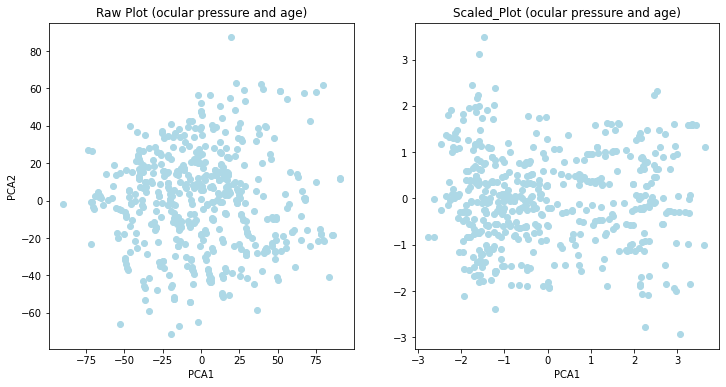

In [27]:
# plotting both the scaled and raw PCA plots for PCA1 = age and PCA2 = ocular pressure

plt.figure(figsize=(12, 6)) 

## define number of rows and columns we want from this plot
nrows=1
ncols=2

plt.subplot(nrows,ncols, 1)
plt.scatter( X_pca[:,0], X_pca[:,1], c='lightblue')
plt.title('Raw Plot (ocular pressure and age)')
plt.xlabel('PCA1') ## x-axis label
plt.ylabel('PCA2') ## y-axis label


plt.subplot(nrows, ncols, 2)
plt.scatter( X_pca2[:,0], X_pca2[:,1], c='lightblue') ## generate scatter plot using the scaled data
plt.title('Scaled_Plot (ocular pressure and age)')
plt.xlabel('PCA1')

Text(0.5, 0, 'PCA1')

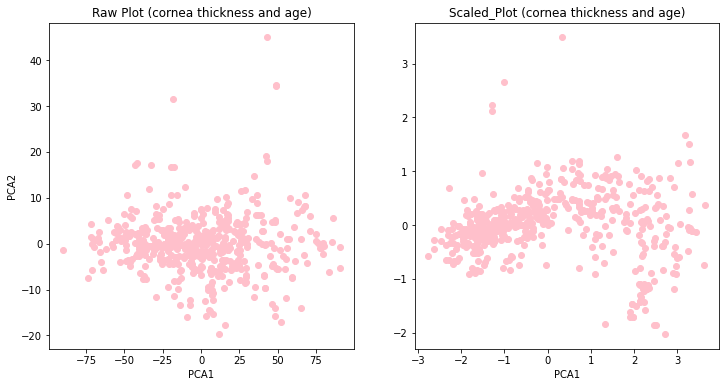

In [28]:
# plotting both the scaled and raw PCA plots for PCA1 = age and PCA2 = cornea thickness

plt.figure(figsize=(12, 6)) 

## define number of rows and columns we want from this plot
nrows=1
ncols=2

plt.subplot(nrows,ncols, 1)
plt.scatter( X_pca[:,0], X_pca[:,4], c='pink')
plt.title('Raw Plot (cornea thickness and age)')
plt.xlabel('PCA1') ## x-axis label
plt.ylabel('PCA2') ## y-axis label


plt.subplot(nrows, ncols, 2)
plt.scatter( X_pca2[:,0], X_pca2[:,4], c='pink') ## generate scatter plot using the scaled data
plt.title('Scaled_Plot (cornea thickness and age)')
plt.xlabel('PCA1')